In [2]:
import serial  # For serial communication
import csv     # For writing data to a CSV file
import time    # For adding time-related delays

# Configure the serial connection
SERIAL_PORT = "/dev/cu.usbmodem14201"  # Replace with your Arduino port
BAUD_RATE = 9600       # Baud rate used in your Arduino code
CSV_FILE = "position_data.csv"  # Name of the output CSV file

def main():
    try:
        # Open the serial port
        ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
        print(f"Connected to {SERIAL_PORT} at {BAUD_RATE} baud.")
        
        # Open the CSV file for writing
        with open(CSV_FILE, mode='w', newline='') as file:
            writer = csv.writer(file)
            
            # Write the header row
            writer.writerow(["Ax", "Ay", "Az", "Pitch", "Roll", "Sleep Position"])
            print("CSV file initialized, waiting for data...")
            
            # Continuously read data from serial and save to CSV
            while True:
                if ser.in_waiting > 0:  # Check if there is data in the buffer
                    line = ser.readline().decode('utf-8').strip()  # Read and decode a line
                    print(f"Received: {line}")
                    
                    # Parse the serial data (assumes comma-separated values)
                    data = line.split(",")  # Split based on commas
                    
                    # Ensure we have the expected number of values
                    if len(data) == 6:  # Adjust if your Arduino sends a different number of values
                        # Write the data to the CSV file
                        writer.writerow(data)
                        print("Data written to CSV.")
                    else:
                        print("Unexpected data format. Skipping...")
    
    except serial.SerialException as e:
        print(f"Error: {e}")
    
    except KeyboardInterrupt:
        print("\nInterrupted by user. Exiting...")
    
    finally:
        # Ensure the serial port is closed
        if 'ser' in locals() and ser.is_open:
            ser.close()
            print("Serial port closed.")
        
        print(f"Data saved to {CSV_FILE}.")

if __name__ == "__main__":
    main()


Connected to /dev/cu.usbmodem14201 at 9600 baud.
CSV file initialized, waiting for data...
Received: MPU6050 connected!
Unexpected data format. Skipping...
Received: Calibrating MPU6050...
Unexpected data format. Skipping...
Received: Offsets calculated:
Unexpected data format. Skipping...
Received: Accel Offsets: 3662, -186, 201
Unexpected data format. Skipping...
Received: Gyro Offsets: 18, 16, 427
Unexpected data format. Skipping...
Received: Calibration complete!
Unexpected data format. Skipping...
Received: 0.00, -0.00, 0.99 , 0.02 , -0.16 ,
Data written to CSV.
Received: Back Sleeping
Unexpected data format. Skipping...
Received: 0.00, -0.00, 0.99 , 0.06 , -0.04 ,
Data written to CSV.
Received: Back Sleeping
Unexpected data format. Skipping...
Received: 1.07, -0.03, 0.12 , 83.73 , -13.99 ,
Data written to CSV.
Received: Stomach Sleeping
Unexpected data format. Skipping...
Received: 0.87, 0.13, -0.12 , 97.62 , 131.72 ,
Data written to CSV.
Received: Unknown/Transition
Unexpected d

OSError: [Errno 6] Device not configured

In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("position_data.csv")

# Display the first few rows to verify the data
print(data.head())

     Ax    Ay    Az  Pitch    Roll  Sleep Position
0  0.00 -0.00  0.99   0.02   -0.16             NaN
1  0.00 -0.00  0.99   0.06   -0.04             NaN
2  1.07 -0.03  0.12  83.73  -13.99             NaN
3  0.87  0.13 -0.12  97.62  131.72             NaN
4  0.91  0.14 -0.09  95.56  123.20             NaN


In [4]:
print(data.describe())

              Ax         Ay         Az      Pitch        Roll  Sleep Position
count  15.000000  15.000000  15.000000  15.000000   15.000000             0.0
mean    0.096667   0.019333   0.459333 -13.734000   61.745333             NaN
std     0.451168   0.048028   0.530047  68.805061   70.550681             NaN
min    -0.220000  -0.030000  -0.120000 -93.140000  -13.990000             NaN
25%    -0.220000  -0.000000  -0.010000 -93.140000   -0.130000             NaN
50%    -0.060000   0.000000   0.120000  -3.460000   -0.040000             NaN
75%     0.000000   0.010000   1.010000   0.040000  137.220000             NaN
max     1.070000   0.140000   1.010000  97.620000  137.220000             NaN


In [4]:
df=pd.DataFrame(data, columns=['Pitch', 'Roll'])
df
array = df.to_numpy()
array[0]=[8.3730e+01, -1.3990e+01]
array[1]=[8.3730e+01, -1.3990e+01]

In [5]:
# Sleep position detection function
def detect_sleep_position(pitch, roll):
    # Directly using simple if-elif-else to detect position
    if abs(roll) < 15 and pitch > -20 and pitch < 20:
        print("Position: Back Sleeping")
    elif abs(roll) > 30 and pitch > -20 and pitch < 20:
        print("Position: Side Sleeping")
    elif abs(roll) < 15 and pitch > 20:
        print("Position: Stomach Sleeping")
    else:
        print("Position: Unknown/Transition")



# Loop to check each row and detect sleep position
for entry in array:
    pitch = entry[0]
    roll = entry[1]
    detect_sleep_position(pitch, roll)  # Detect and print sleep position

Position: Stomach Sleeping
Position: Stomach Sleeping
Position: Stomach Sleeping
Position: Unknown/Transition
Position: Unknown/Transition
Position: Back Sleeping
Position: Back Sleeping
Position: Back Sleeping
Position: Back Sleeping
Position: Back Sleeping
Position: Unknown/Transition
Position: Unknown/Transition
Position: Unknown/Transition
Position: Unknown/Transition
Position: Unknown/Transition


In [131]:
array

array([[ 1.0700e+00, -3.0000e-02,  1.2000e-01,  8.3730e+01, -1.3990e+01,
         0.0000e+00],
       [ 1.0700e+00, -3.0000e-02,  1.2000e-01,  8.3730e+01, -1.3990e+01,
         0.0000e+00],
       [ 1.0700e+00, -3.0000e-02,  1.2000e-01,  8.3730e+01, -1.3990e+01,
                nan],
       [ 8.7000e-01,  1.3000e-01, -1.2000e-01,  9.7620e+01,  1.3172e+02,
                nan],
       [ 9.1000e-01,  1.4000e-01, -9.0000e-02,  9.5560e+01,  1.2320e+02,
                nan],
       [-6.0000e-02, -0.0000e+00,  1.0100e+00, -3.4600e+00, -1.3000e-01,
                nan],
       [-6.0000e-02, -0.0000e+00,  1.0100e+00, -3.4600e+00, -1.3000e-01,
                nan],
       [-6.0000e-02, -0.0000e+00,  1.0100e+00, -3.4600e+00, -1.3000e-01,
                nan],
       [-6.0000e-02, -0.0000e+00,  1.0100e+00, -3.4600e+00, -1.3000e-01,
                nan],
       [-6.0000e-02, -0.0000e+00,  1.0100e+00, -3.4600e+00, -1.3000e-01,
                nan],
       [-2.2000e-01,  1.0000e-02, -1.0000e-02, -9.

In [132]:
data1=pd.DataFrame(array)
data1.columns=['Ax','Ay','Az','Pitch','Roll', 'Sleep Position']

In [133]:
data1=data1.drop('Sleep Position', axis=1, inplace=False)


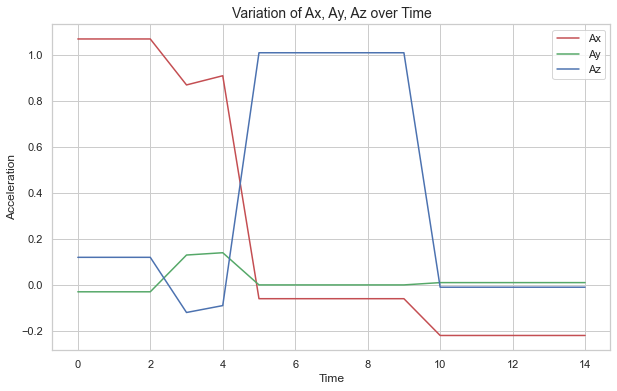

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting Ax, Ay, Az
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each of Ax, Ay, Az with labels
plt.plot(data1.index, data1['Ax'], label='Ax', color='r')
plt.plot(df.index, data1['Ay'], label='Ay', color='g')
plt.plot(df.index, data1['Az'], label='Az', color='b')

# Adding title and labels
plt.title('Variation of Ax, Ay, Az over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)  # X-axis label
plt.ylabel('Acceleration', fontsize=12)  # Y-axis label

# Display legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

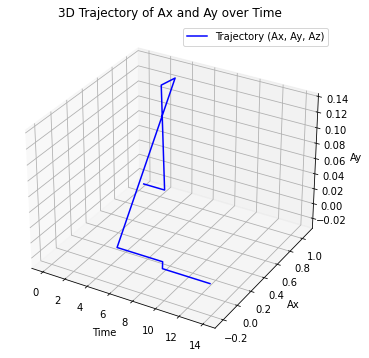

In [44]:


# Create a time variable (e.g., assuming row index represents time)
time = data1.index

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory of Ax, Ay, Az over time
ax.plot(time, data1['Ax'], data1['Ay'], label='Trajectory (Ax, Ay, Az)', color='b')

# Labels and Title
ax.set_xlabel('Time')
ax.set_ylabel('Ax')
ax.set_zlabel('Ay')
ax.set_title('3D Trajectory of Ax and Ay over Time')

# Show legend
ax.legend()

# Show the plot
plt.show()

In [135]:
data1

,Ax,Ay,Az,Pitch,Roll
0,1.07,-0.03,0.12,83.73,-13.99
1,1.07,-0.03,0.12,83.73,-13.99
2,1.07,-0.03,0.12,83.73,-13.99
3,0.87,0.13,-0.12,97.62,131.72
4,0.91,0.14,-0.09,95.56,123.20
5,-0.06,-0.00,1.01,-3.46,-0.13
6,-0.06,-0.00,1.01,-3.46,-0.13
7,-0.06,-0.00,1.01,-3.46,-0.13
8,-0.06,-0.00,1.01,-3.46,-0.13
9,-0.06,-0.00,1.01,-3.46,-0.13


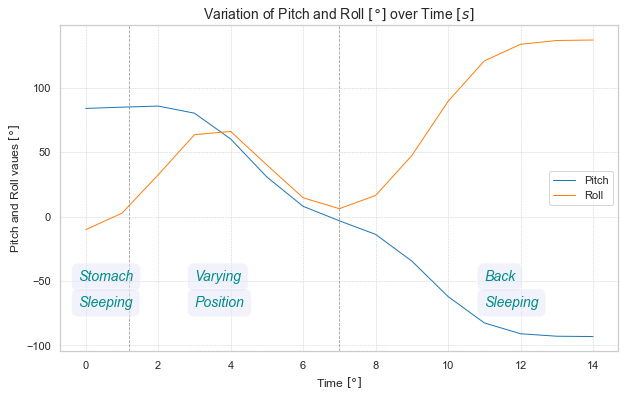

In [136]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filter (sigma controls the smoothing)
y1_smooth = gaussian_filter(data1['Pitch'], sigma=1.3)  # Higher sigma = smoother
y2_smooth = gaussian_filter(data1['Roll'], sigma=1.3)  # High
import seaborn as sns
# Use Seaborn's 'darkgrid' style
sns.set(style='whitegrid')

# Plotting Pitch and Roll
plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(data1.index, y1_smooth, label='Pitch', color='tab:blue', linewidth=1)
plt.plot(data1.index, y2_smooth, label='Roll', color='tab:orange', linewidth=1)

# Add a vertical dashed line at x = 1.2
plt.axvline(x=1.2, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add a vertical dashed line at x = 1.2
plt.axvline(x=7, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add text at a specific point (for example at x=2, y=4)
plt.text(-0.2,-50, "Stomach", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(-0.2,-70, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(3,-50, "Varying", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(3,-70, "Position", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(11,-50, "Back", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(11,-70, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))



# Adding title and labels
plt.title('Variation of Pitch and Roll $[°]$ over Time $[s]$', fontsize=14)
plt.xlabel('Time $[°]$', fontsize=12)  # X-axis label
plt.ylabel('Pitch and Roll vaues $[°]$', fontsize=12)  # Y-axis label
# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [4]:
data1=pd.DataFrame(array)
data1.columns=['Ax','Ay','Az','Pitch','Roll', 'Sleep Position']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 6 elements

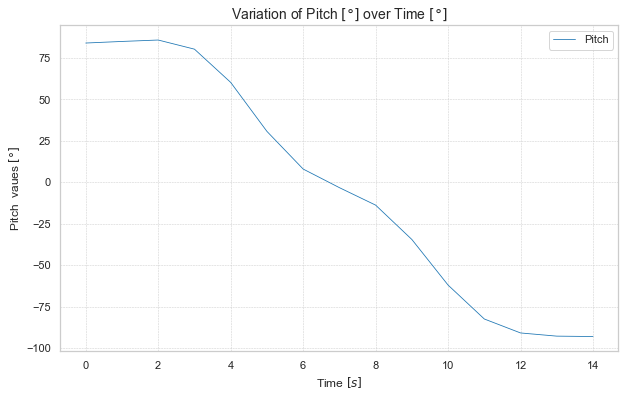

In [73]:


# Apply Gaussian filter (sigma controls the smoothing)
y1_smooth = gaussian_filter(data1['Pitch'], sigma=1.3)  # Higher sigma = smoother

import seaborn as sns
# Use Seaborn's 'darkgrid' style
sns.set(style='whitegrid')

# Plotting Pitch and Roll
plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(data1.index, y1_smooth, label='Pitch', color='tab:blue', linewidth=0.8)



# Adding title and labels
plt.title('Variation of Pitch $[°]$ over Time $[°]$', fontsize=14)
plt.xlabel('Time $[s]$', fontsize=12)  # X-axis label
plt.ylabel('Pitch  vaues $[°]$', fontsize=12)  # Y-axis label
# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

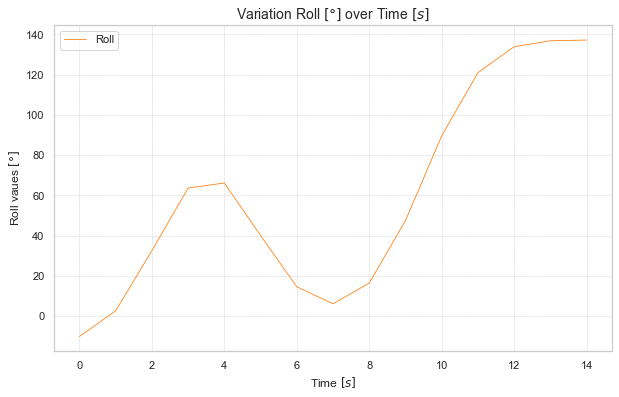

In [72]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filter (sigma controls the smoothing)

y2_smooth = gaussian_filter(data1['Roll'], sigma=1.3)  # High

# Use Seaborn's 'darkgrid' style
sns.set(style='whitegrid')

# Plotting Pitch and Roll
plt.figure(figsize=(10, 6))  # Set the figure size


plt.plot(data1.index, y2_smooth, label='Roll', color='tab:orange', linewidth=0.8)


# Adding title and labels
plt.title('Variation Roll $[°]$ over Time $[s]$', fontsize=14)
plt.xlabel('Time $[s]$', fontsize=12)  # X-axis label
plt.ylabel('Roll vaues $[°]$', fontsize=12)  # Y-axis label
# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

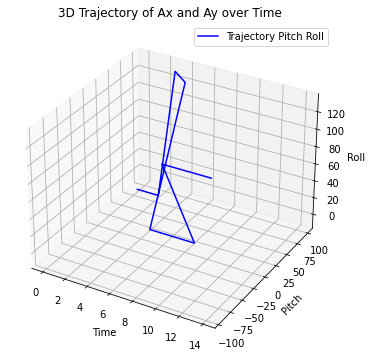

In [46]:

# Create a time variable (e.g., assuming row index represents time)
time = data1.index

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory of Ax, Ay, Az over time
ax.plot(time, data1['Pitch'], data1['Roll'], label='Trajectory Pitch Roll', color='b')

# Labels and Title
ax.set_xlabel('Time')
ax.set_ylabel('Pitch')
ax.set_zlabel('Roll')
ax.set_title('3D Trajectory of Ax and Ay over Time')

# Show legend
ax.legend()

# Show the plot
plt.show()

In [17]:
data


,Ax,Ay,Az,Pitch,Roll,Sleep Position
0,0.00,-0.00,0.99,0.02,-0.16,NaN
1,0.00,-0.00,0.99,0.06,-0.04,NaN
2,1.07,-0.03,0.12,83.73,-13.99,NaN
3,0.87,0.13,-0.12,97.62,131.72,NaN
4,0.91,0.14,-0.09,95.56,123.20,NaN
5,-0.06,-0.00,1.01,-3.46,-0.13,NaN
6,-0.06,-0.00,1.01,-3.46,-0.13,NaN
7,-0.06,-0.00,1.01,-3.46,-0.13,NaN
8,-0.06,-0.00,1.01,-3.46,-0.13,NaN
9,-0.06,-0.00,1.01,-3.46,-0.13,NaN
